In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

In [20]:
def show(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imshow(img_rgb)
    
def Imagedetection(img,numcards):
    
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(1,1),1000)
    flag, thresh = cv2.threshold(blur, 120, 255, cv2.THRESH_BINARY)
    # Find contours
    image,contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea,reverse=True) 
    # Select long perimeters only
    perimeters = [cv2.arcLength(contours[i],True) for i in range(len(contours))]
    listindex=[i for i in range(numcards) if perimeters[i]>perimeters[0]/2]
    # Show image
    imgcont = img.copy()
    [cv2.drawContours(imgcont, [contours[i]], 0, (0,255,0), 5) for i in listindex]
    
    plt.imshow(imgcont)
    

def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0

    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True

    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1

    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
        key=lambda b:b[1][i], reverse=reverse))

    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

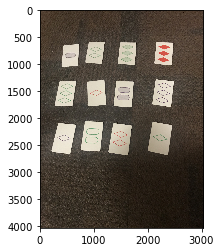

In [18]:
#Reading the Image in with OpenCV imread
img = cv2.imread('../IMG_1821.JPG',cv2.IMREAD_COLOR) #cv2.IMREAD_COLOR means Loads a color image.default flag.
#Other parameters include 
show(img)

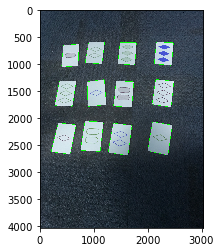

In [19]:
Imagedetection(img,12)

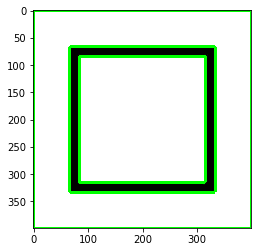

In [8]:
x, y = [], []

for contour_line in contours:
    for contour in contour_line:
        x.append(contour[0][0])
        y.append(contour[0][1])

x1, x2, y1, y2 = min(x), max(x), min(y), max(y)

cropped = img[y1:y2, x1:x2]
imshow(cropped)

In [17]:
contours[0][1]

array([[  0, 599]], dtype=int32)